## Abstract

In this work we will to take a look at a data visualization using Python and the Titanic dataset. It's not intended to be the most accurate Titanic dataset analysis about Titanic, it's a project resultant of the course Data Analyst Nanodegree by Udacity,however it is a serious project, so I believe it will be interesting to demonstrate the process to generate a data visualization and Make some inferences about the data.

## Introdução

Iremos trabalhar com um conjunto dados contendo dados demográficos e informações de 891 dos 2224 passageiros e tripulantes a bordo do Titanic. É possível encontrar mais informações sobre este conjunto de dados no [site do Kaggle] (https://www.kaggle.com/c/titanic/data).

O trabalho terá como "norte" 3 questões que nós direcionarão na exploração dos dados e no desenvolvimento da visualização. As questões são:

1. Quantidade de pessoas por sexo.
2. Quantidade de crianças, adultos e idosos, categorizadas por sexo.
3. Sexo e idade maioria entre os sobreviventes.

## Preparação dos dados

### Obtendo os dados

#### Imports

Declaração de todos os importes do projeto.

In [17]:
import pandas
import numpy
import matplotlib.pyplot as plt

#### Lendo o arquivo

Lê o arquivo que contém o conjunto de dados e verifica superficialmente se os dados foram carregados corretamente.

In [2]:
titanic_dataframe = pandas.read_csv("data/titanic_data.csv")

#Display total of rows in dataset
print "Total rows = "+str(len(titanic_dataframe))
print ""

#Print only the 5 first rows
print "Preview:"
titanic_dataframe.head(5)

Total rows = 891

Preview:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Limpeza de dados

O processo de limpeza será executado para cada questão que esse trabalho se propõe a explorar, em outras palavras, será um processo iterativo durante as fases de investigação e exploração.

## Investigação e Exploração

De agora em diante começaremos a investigação e exploração dos dados tendo como guia as 3 questões levantadas na introdução.

### 1. Quantidade de pessoas por sexo.

Para responder essa questão nós iremos analisar o nosso conjunto de dados para descobrir se existe algum tipo de dado que possa ser utilizado para nos ajudar na resolução dessa questão.

Ao analisar o conjunto de dados é possível observar que existe uma coluna nomeada como *Sex*, nela aparentemente contém o sexo para cada passageiro da lista, digo aparentemente pois pode existe algum valor inválido ou a ausência de valor para algum registro(entenda passageiro).

Então a primeira coisa que iremos fazer é saber se todos os dados satisfazem as opções *male* ou *female*, para realizar essa tarefa iremos listar todos os dados que não são *male* ou *female*

In [3]:
#verifica se existe algum erro nos valores da coluna Sex
count_errors = 0
for sex in titanic_dataframe['Sex']:
    if sex!="female" and sex!="male":
        count_errors += 1

count_errors 


0

A verificação retornou 0 erros, ou seja, todos os dados da coluna *Sex* do nosso dataframe estão corretos para o nosso objetivo, não precisando de correções ou intervenções, sendo assim seguiremos em frente para satisfazer a questão levantada.

In [4]:
males = titanic_dataframe[titanic_dataframe['Sex'] == 'male']
males_count = males['Sex'].value_counts()['male']
print "Quantidade de homens: "+str(males_count)

females = titanic_dataframe[titanic_dataframe['Sex'] == 'female']
females_count = females['Sex'].value_counts()['female']
print "Quantidade de mulheres: "+str(females_count)

print "Total de Passageiros: "+str(males_count+females_count)


Quantidade de homens: 577
Quantidade de mulheres: 314
Total de Passageiros: 891


Agora que a primeira questão foi satisfeita poderemos continuar a nossa exploração seguindo para a segunda questão.

### 2. Quantidade de crianças, adultos e idosos, categorizadas por sexo.

Executaremos o mesmo processo de analisar os dados para descobrir como podemos aproveitá-los, se existe algum problema que possa atrapalhar nossa exploração, se existir criaremos uma solução e por fim iremos explorálos.

Já sabemos que temos uma coluna *Age* e nela aparentemente temos valores em float, o código abaixo confirma esse pressuposto.

In [5]:
#Check Datatype collumn
print "Tipo de dado: "+str(titanic_dataframe['Age'].dtype)

Tipo de dado: float64


Agora iremos checar se existe algum erro na coluna *Age*, para isso será utilizado os dataframes males e females criados na questão anterior, esses dataframes serão utilizados pois eles já estão separados por sexo o que facilitará o trabalho na questão atual.

Antes de procurar por erros é preciso imaginar quais possíveis erros os dados podem conter, foi imaginado 2 possíveis erros:

1. **Dados nulos:** Na questão atual iremos categorizar os dados por idade e sexo, sabemos que os dados para sexo estão corretos, então precisamos saber se os dados relacionados a idade estão todos presentes.
2. **Dados não numéricos:** Como iremos utilizar dados relacionados a idade precisamos que eles sejam numéricos.

Começaremos buscando dados nulos no dataframe males:

In [6]:
#Check data males with errors
print "Males"

#Get all data males with null(NaN) in the column Age
males_errors = males[pandas.isnull(males['Age'])]

print "Quantidade erros: "+str(len(males_errors))
males_errors.head()

Males
Quantidade erros: 124


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C


Encontramos 124 dados nulos na coluna *Age* do dataframe males.

Vamos checar se existe algum no dataframe females:

In [7]:
print ""
print "Females"
females_errors = females[pandas.isnull(females['Age'])]
print "Quantidade erros: "+str(len(females_errors))
females_errors.head()


Females
Quantidade erros: 53


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
47,48,1,3,"O'Driscoll, Miss. Bridget",female,NaN,0,0,14311,7.7500,NaN,Q


Encontramos 53 dados nulos na coluna *Age* do dataframe feminino.

Agora que já é conhecido que a coluna *Age* de ambos os dataframes contém dados nulos é preciso criar um novo conjunto de dados contendo somente dados onde a coluna *Age* possui algum valor. Não é preciso se preocupar com a coluna sexo, pois já é sabido que ela possui todos os dados corretamente.

Com os trechos de códigos abaixo iremos obter somente os dados não nulos do conjunto females e males, além disso já faremos um teste nos dados para verificar se eles são númericos. Não podemos fazer esse teste antes de remover dados com NaN, pois aparentemente numpy.isreal trata NaN como valor real.

Primeiro será criado um dataframe chamado males_normalized que conterá todos os registros que possuem valores válidos na coluna *Age*

In [8]:
print ""
print "Males"
males_notnull = males[pandas.notnull(males['Age'])]
males_normalized = males_notnull[males_notnull['Age'].apply(numpy.isreal)]
print ""
#Check if all data about males is present
print "Erros: "+str(len(males_errors))
print "Válidos: "+str(len(males_normalized))
print "Total: "+str(len(males_errors) + len(males_normalized))+" = "+str(len(males))
print ""
print "Quantidade de dados válidos: "+str(len(males_normalized))
males_normalized.head()




Males

Erros: 124
Válidos: 453
Total: 577 = 577

Quantidade de dados válidos: 453


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S


Agora será criado um dataframe chamado females_normalized que conterá todos os registros de females que possuem valores válidos na coluna *Age*

In [9]:
print ""
print "Females"
females_notnull = females[pandas.notnull(females['Age'])]
females_normalized = females_notnull[females_notnull['Age'].apply(numpy.isreal)]

print ""
#Check if all data about males is present
print "Erros: "+str(len(females_errors))
print "Válidos: "+str(len(females_normalized))
print "Total: "+str(len(females_errors) + len(females_normalized))+" = "+str(len(females))
print ""

print "Quantidade de dados válidos: "+str(len(females_normalized))
females_normalized.head()


Females

Erros: 53
Válidos: 261
Total: 314 = 314

Quantidade de dados válidos: 261


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Com dataframes de males e females contendo somente dados válidos tanto para o sexo como para a idade é possível seprar os dados em crianças, adultos e idosos.

Para isso será definido as "classes" de idade para separar cada categoria:  
Crianças: [0 - 18[  
Adultos:  [18 - 50[  
Idosos:   [50 - +50]  

Definido o que significa crianças, adultos e idosos pode-se seguir para os dados:

In [10]:
boys = males_normalized[males_normalized['Age'] < 18]
girls = females_normalized[females_normalized['Age'] < 18]

men = males_normalized[(males_normalized['Age'] >= 18) & (males_normalized['Age'] < 50)]
women = females_normalized[(females_normalized['Age'] >= 18) & (females_normalized['Age'] < 50)]

old_men = males_normalized[males_normalized['Age'] >= 50]
old_women = females_normalized[females_normalized['Age'] >= 50]

Vamos chegar se os dados estão corretos visualizando parte de cada dataframe gerado:

In [11]:
boys.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
50,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,NaN,S


In [12]:
girls.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S


In [13]:
men.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,NaN,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.050,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S
20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.000,NaN,S


In [14]:
women.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S


In [15]:
old_men.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
94,95,0,3,"Coxon, Mr. Daniel",male,59.0,0,0,364500,7.2500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C


In [16]:
old_women.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C
259,260,1,2,"Parrish, Mrs. (Lutie Davis)",female,50.0,0,1,230433,26.0000,NaN,S


Aparentemente tudo está correto, sendo assim já é possível gerar um gráfico categorizando por idade e sexo dos passageiros presentes no Titanic de acordo com *dataset* em questão:

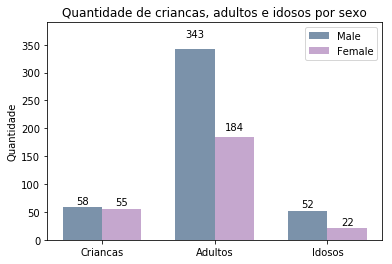

In [97]:
boys_count = len(boys)
girls_count = len(girls)

men_count = len(men)
women_count = len(women)

old_men_count = len(old_men)
old_women_count = len(old_women)

N = 3
males_sex = (boys_count, men_count, old_men_count)

ind = numpy.arange(N)
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(ind, males_sex, width, color='#7b92aa')

females_sex = (girls_count, women_count, old_women_count)
rects2 = ax.bar(ind + width, females_sex, width, color='#c5a7ce')

ax.set_ylabel('Quantidade')
ax.set_title('Quantidade de criancas, adultos e idosos por sexo')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Criancas', 'Adultos', 'Idosos'))
ax.set_ylim([0, 390])

ax.legend((rects1[0], rects2[0]), ('Male', 'Female'))

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

E assim a questão 2 foi satisfeita, agora será proposto uma solução para a questão 3.

### 3. Sexo e idade maioria entre os sobreviventes.

Nessa última questão iremos fazer o mesmo processo realizado nas outras questões:

1. Analisar os dados.
2. Decidir como iremos aproveitá-los.
3. Corrigir qualquer tipo de problema nos dados.
4. Explorar.
5. Gerar a visualização.

O processo aparentemente será mais simples, já que boa parte do trabalho foi realizado na questão 2. Os dados já foram analisados e é sabido que existe uma coluna *Survied*, esta coluna possui valores aparentemente entre 0 e 1, sendo:

1. 0 = Não sobreviveu
2. 1 = Sobreviveu

Iremos utilizar esses valores para satisfazer a questão atual. Já decididos os dados a serem utilizados é preciso verificar se existe algum problema com eles, o problema mais comum é a falta de algum valor, então assim como foi feito na questão 2, será verificado com o código abaixo dados faltantes para cada categoria de idade e sexo.

In [40]:
print "Crianças"
boys_null_count = boys[pandas.isnull(boys['Survived'])]
print "Total de dados nulos em boys dataframe: "+str(len(boys_null_count))

girls_null_count = girls[pandas.isnull(girls['Survived'])]
print "Total de dados nulos em girls dataframe: "+str(len(girls_null_count))

print ""
print "Adultos"
men_null_count = men[pandas.isnull(men['Survived'])]
print "Total de dados nulos em men dataframe: "+str(len(men_null_count))

women_null_count = women[pandas.isnull(women['Survived'])]
print "Total de dados nulos em women dataframe: "+str(len(women_null_count))

print ""
print "Idosos"
old_men_null_count = old_men[pandas.isnull(old_men['Survived'])]
print "Total de dados nulos em old_men dataframe: "+str(len(old_men_null_count))

old_women_null_count = old_women[pandas.isnull(old_women['Survived'])]
print "Total de dados nulos em old_women dataframe: "+str(len(old_women_null_count))

Crianças
Total de dados nulos em boys dataframe: 0
Total de dados nulos em girls dataframe: 0

Adultos
Total de dados nulos em men dataframe: 0
Total de dados nulos em women dataframe: 0

Idosos
Total de dados nulos em old_men dataframe: 0
Total de dados nulos em old_women dataframe: 0


A aparentemente nenhum dado está faltando, então iremos procurar por dados diferente de 0 e 1:

In [47]:
print "Crianças"
boys_invalid_count = boys[(boys['Survived'] != 0) & (boys['Survived'] != 1)]
print "Total de dados inválidos em boys dataframe: "+str(len(boys_invalid_count))

girls_invalid_count = girls[(girls['Survived'] != 0) & (girls['Survived'] != 1)]
print "Total de dados inválidos em girls dataframe: "+str(len(girls_invalid_count))

print ""
print "Adultos"
men_invalid_count = men[(men['Survived'] != 0) & (men['Survived'] != 1)]
print "Total de dados inválidos em men dataframe: "+str(len(men_invalid_count))

women_invalid_count = women[(women['Survived'] != 0) & (women['Survived'] != 1)]
print "Total de dados inválidos em women dataframe: "+str(len(women_invalid_count))

print ""
print "Idosos"
old_men_invalid_count = old_men[(old_men['Survived'] != 0) & (old_men['Survived'] != 1)]
print "Total de dados inválidos em old_men dataframe: "+str(len(old_men_invalid_count))

old_women_invalid_count = old_women[(old_women['Survived'] != 0) & (old_women['Survived'] != 1)]
print "Total de dados inválidos em old_women dataframe: "+str(len(old_women_invalid_count))

Crianças
Total de dados inválidos em boys dataframe: 0
Total de dados inválidos em girls dataframe: 0

Adultos
Total de dados inválidos em men dataframe: 0
Total de dados inválidos em women dataframe: 0

Idosos
Total de dados inválidos em old_men dataframe: 0
Total de dados inválidos em old_women dataframe: 0


E aparentemente nenhum dado é diferente de 0 e 1, sendo assim podemos passar para a exploração dos dados e por fim gerar uma visualização.

A intenção dessa questão é obter o sexo e a idade maioria entre os sobreviventes, para isso será selecionado somente os sobreviventes para cada dataframe de idade e sexo, por fim será gerado uma visualização dos dados com a finalidade de explicitar um solução para a questão atual.

In [53]:
# Children survived
boys_survived = boys[boys['Survived'] == 1]
girls_survived = girls[girls['Survived'] == 1]

# Adults survived
men_surivived = men[men['Survived']==1]
women_surivived = women[women['Survived']==1]

# Elderly survived
old_men_surivived = old_men[old_men['Survived']==1]
old_women_surivived = old_women[old_women['Survived']==1]

Abaixo a visualização dos novos dataframes:

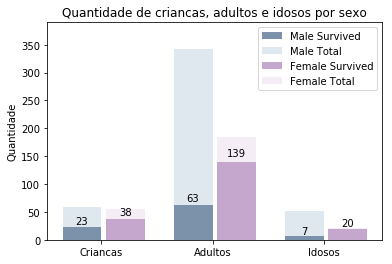

In [96]:
boys_count_survived = len(boys_survived)
girls_count_survived = len(girls_survived)

men_count_survived = len(men_surivived)
women_count_survived = len(women_surivived)

old_men_count_survived = len(old_men_surivived)
old_women_count_survived = len(old_women_surivived)

N = 3
males_sex_survived = (boys_count_survived, men_count_survived, old_men_count_survived)
males_sex = (boys_count-boys_count_survived, men_count-men_count_survived, old_men_count-old_men_count_survived)

ind = numpy.arange(N)
width = 0.35

fig, ax = plt.subplots()
rects1a = ax.bar(ind, males_sex_survived, width, color='#7b92aa')
rects1b = ax.bar(ind, males_sex, width, alpha=0.8, color='#D8E2EC', bottom=males_sex_survived)

females_sex_survived = (girls_count_survived, women_count_survived, old_women_count_survived)
females_sex = (girls_count - girls_count_survived, women_count - women_count_survived, old_women_count - old_women_count_survived)
rects2a = ax.bar(ind + width + 0.04, females_sex_survived, width, color='#c5a7ce')
rects2b = ax.bar(ind + width + 0.04, females_sex, width, color='#F4EDF6', bottom=females_sex_survived)

ax.set_ylabel('Quantidade')
ax.set_title('Quantidade de criancas, adultos e idosos por sexo')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Criancas', 'Adultos', 'Idosos'))
ax.set_ylim([0, 390])

ax.legend((rects1a[0], rects1b[0], rects2a[0], rects2b[0]), ('Male Survived', 'Male Total', 'Female Survived', 'Female Total'))

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1a)
autolabel(rects2a)

plt.show()